In [21]:
import numpy as np
import matplotlib.pyplot as plt

nx = 31
x = np.linspace(0,3,nx)
dx = x[2] - x[1]
gamma = 1.4
gamma_inverse = 1/gamma;
nt = 1400
cfl = 0.5
total_time = 0;


rho = np.zeros((nx))
T = np.zeros((nx))
A = np.zeros((nx))
v = np.zeros((nx))
P = np.zeros((nx))
mach_number = np.zeros((nx))
mass_flow = np.zeros((nx))

rho_throat = np.zeros((nt))
pressure_throat = np.zeros((nt))
velocity_throat = np.zeros((nt))
temp_throat = np.zeros((nt))
mach_number_throat = np.zeros((nt))
mass_flow_throat = np.zeros((nt))

#Initial profile
for i in range(nx):
    if x[i] <=0.5:
        rho[i] = 1
        T[i] = 1
    elif(x[i] > 0.5 and x[i] <= 1.5):
        rho[i] = 1 - 0.366*(x[i] - 0.5)
        T[i] = 1 - 0.167*(x[i] - 0.5)
    elif(x[i]>1.5 and x[i]<=2.1):
        rho[i] = 0.634 - 0.3879*(x[i]-1.5)
        T[i] = 0.833 - 0.3507*(x[i]-1.5)
    elif(x[i] > 2.1 and x[i] <= 3):
        rho[i] = 0.5892 + 0.10228*(x[i] - 2.1)
        T[i] = 0.93968 + 0.0622*(x[i] - 2.1)

    A[i] = 1 + 2.2*((x[i]-1.5)**2)
    v[i] = 0.59/(rho[i]*A[i])
    P[i] = rho[i]*T[i]
    mass_flow[i] = rho[i]*v[i]*A[i]
    
mass_flow_rate_initial = rho*v*A
throat = np.where(A == 1)
throat = throat[0]

mass_flow_50 = np.zeros((nx))
mass_flow_100 = np.zeros((nx))
mass_flow_150 = np.zeros((nx))
mass_flow_200 = np.zeros((nx))
mass_flow_700 = np.zeros((nx))
print(T)
print(rho)
print(v)
print(mass_flow_rate_initial)
print(A)

[1.      1.      1.      1.      1.      1.      0.9833  0.9666  0.9499
 0.9332  0.9165  0.8998  0.8831  0.8664  0.8497  0.833   0.79793 0.76286
 0.72779 0.69272 0.65765 0.62258 0.9459  0.95212 0.95834 0.96456 0.97078
 0.977   0.98322 0.98944 0.99566]
[1.       1.       1.       1.       1.       1.       0.9634   0.9268
 0.8902   0.8536   0.817    0.7804   0.7438   0.7072   0.6706   0.634
 0.59521  0.55642  0.51763  0.47884  0.44005  0.40126  0.599428 0.609656
 0.619884 0.630112 0.64034  0.650568 0.660796 0.671024 0.681252]
[0.09915966 0.11106928 0.12505299 0.1415547  0.16111415 0.184375
 0.22013457 0.26436838 0.31894726 0.38570885 0.46590595 0.55918828
 0.66212353 0.76679781 0.86086999 0.93059937 0.96990879 0.97458648
 0.95142762 0.91134937 0.86500434 0.82051805 0.47366298 0.40189322
 0.34212472 0.29260671 0.25160719 0.21758633 0.18924598 0.16552206
 0.14555504]
[0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0

In [22]:
#Initial Solution
U1 = np.zeros((nx))
U2 = np.zeros((nx))
U3 = np.zeros((nx))

U1_old = np.zeros((nx))
U2_old = np.zeros((nx))
U3_old = np.zeros((nx))

F1 = np.zeros((nx))
F2 = np.zeros((nx))
F3 = np.zeros((nx))
J = np.zeros((nx))

dU1_dt_p = np.zeros((nx))
dU2_dt_p = np.zeros((nx))
dU3_dt_p = np.zeros((nx))

dU1_dt_c = np.zeros((nx))
dU2_dt_c = np.zeros((nx))
dU3_dt_c = np.zeros((nx))

dU1_dt_av = np.zeros((nx))
dU2_dt_av = np.zeros((nx))
dU3_dt_av = np.zeros((nx))

for i in range(nx):
    U1[i] = rho[i]*A[i]
    U2[i] = rho[i]*A[i]*v[i]
    U3[i] = rho[i]*(T[i]/(gamma - 1) + (gamma/2)*(v[i]**2))*A[i]
print(U1)
print(U1[15])

print(U2)
print(U2[15])

print(U3)
print(U3[15])

[5.95       5.312      4.718      4.168      3.662      3.2
 2.6801788  2.2317344  1.8498356  1.5296512  1.26635    1.0551008
 0.8910724  0.7694336  0.6853532  0.634      0.60830462 0.60538496
 0.62012074 0.64739168 0.6820775  0.71905792 1.24561138 1.46805165
 1.72451729 2.0163584  2.34492508 2.71156742 3.11763553 3.56447949
 4.0534494 ]
0.634
[0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59 0.59
 0.59 0.59 0.59]
0.59
[14.91595294 13.32587161 11.84664688 10.47846209  9.22154014  8.07614688
  6.67946511  5.50217032  4.52462231  3.727974    3.09394359  2.60439401
  2.24072211  1.98328067  1.81140084  1.70464254  1.6140336   1.55706414
  1.52123379  1.4975402   1.47866746  1.45805165  3.14118233  3.66038524
  4.27298226  4.98309322  5.79492969  6.71286659  7.7414626   8.88545707
 10.14975781]
1.704642539432177


In [23]:
for time in range(nt):

    U1_old = U1.copy()
    U2_old = U2.copy()
    U3_old = U3.copy()

    dt=np.min((0.5*dx)/(T**0.5 + v))
    print(dt)

    #F1[:] = U2[:]
    #F2[:] = U2[:]**2/U1[:] + ((gamma-1/gamma))*(U3[:]-(gamma/2)*(U2[:]**2/U1[:]))
    #F3[:] = (gamma*((U2[:]*U3[:])/U1[:])) - (gamma*(gamma-1)/2)*(U2[:]**3/U1[:]**2)
    for i in range(nx):
        F1[i] = U2[i]
        F2[i] = ((U2[i]**2)/U1[i]) + (((gamma-1)/gamma))*(U3[i] - ((gamma/2)*((U2[i]**2)/U1[i])))
        F3[i] = (gamma*((U2[i]*U3[i])/U1[i])) - (gamma*(gamma-1)/2)*(U2[i]**3/U1[i]**2)
    print(F1[15])
    print(F2[15])
    print(F2[16])
    print(F3[15]) 
    print(F3[16])
    #Predictor step
    for i in range (1,nx-1):
        dA_dx = (A[i+1] - A[i])/dx
        J[i] = gamma_inverse*rho[i]*T[i]*dA_dx

        dU1_dt_p[i] = -((F1[i+1] - F1[i])/dx)
        dU2_dt_p[i] = -((F2[i+1] - F2[i])/dx) + J[i]
        dU3_dt_p[i] = -((F3[i+1] - F3[i])/dx)

        #solution update    
        U1[i] = U1[i] + dU1_dt_p[i]*dt #S1
        U2[i] = U2[i] + dU2_dt_p[i]*dt #S2 
        U3[i] = U3[i] + dU3_dt_p[i]*dt #S3


    #getting the primitives
    for i in range(1,nx-1):
        rho[i] = U1[i]/A[i]
        v[i] = U2[i]/U1[i]
        T[i] = (gamma - 1)*((U3[i]/U1[i]) - ((gamma/2)*(v[i]**2)))
        P[i] = rho[i]*T[i]

    #updating F values
    for i in range(1,nx-1):
        F1[i] = U2[i]
        F2[i] = ((U2[i]**2)/U1[i]) + (((gamma-1)/gamma))*(U3[i] - ((gamma/2)*((U2[i]**2)/U1[i])))
        F3[i] = gamma*(U2[i]*U3[i]/U1[i]) - (gamma*(gamma-1)/2)*(U2[i]**3/U1[i]**2)

    #update S
    
    #Corrector Step
    for i in range(nx-2,0,-1):
        dA_dx = (A[i] - A[i-1])/dx
        J[i] = gamma_inverse*rho[i]*T[i]*dA_dx

        dU1_dt_c[i] = -((F1[i] - F1[i-1])/dx)
        dU2_dt_c[i] = -((F2[i] - F2[i-1])/dx) + J[i]
        dU3_dt_c[i] = -((F3[i] - F3[i-1])/dx)
    
       
        #Final solution update 
        U1[i] = U1_old[i] + 0.5*(dU1_dt_p[i] + dU1_dt_c[i])*dt #S1
        U2[i] = U2_old[i] + 0.5*(dU2_dt_p[i] + dU2_dt_c[i])*dt #S2
        U3[i] = U3_old[i] + 0.5*(dU3_dt_p[i] + dU3_dt_c[i])*dt #S3
    #Applying boundary condition

    #inlet
    U1[0] = rho[0]*A[0]
    U2[0] = 2*U2[1] - U2[2]
    U3[0] = U1[0]*((T[0]/(gamma-1)) + (gamma/2)*(v[0]**2))

    #outlet
    U1[nx-1] = 2*U1[nx-2] - U1[nx-3]
    U2[nx-1] = 2*U2[nx-2] - U2[nx-3]
    U3[nx-1] = ((P[nx-1]*A[nx-1])/(gamma - 1)) + (gamma/2)*(U2[nx-1])*(v[nx-1])

    
    rho = U1/A
    v = U2/U1
    T = (gamma - 1)*((U3/U1) - ((gamma/2)*(v**2)))
    P = rho*T
    mass_flow = rho*A*v
    mach_number = v/T**0.5


    #calculating variables in throat
    rho_throat[time] = rho[throat] 
    pressure_throat[time] = P[throat] 
    velocity_throat[time] = v[throat] 
    temp_throat[time] = T[throat] 
    mach_number_throat[time] = mach_number[throat] 
    mass_flow_throat[time] = mass_flow[throat]

    if(time == 50):
        mass_flow_50[:] = mass_flow[:]
    if(time == 100):
        mass_flow_100[:] = mass_flow[:]
    if(time == 150):
        mass_flow_150[:] = mass_flow[:]
    if(time == 200):
        mass_flow_200[:] = mass_flow[:]
    if (time == 700):
        mass_flow_700[:] = mass_flow[:]


0.026835867603327315
0.59
0.9262836277602524
0.9189494062712701
2.077809271711332
2.0362440768784826
0.026666125210039495
0.5886490284391098
0.9242636660824921
0.9311347096797729
2.073562169659648
2.0697042903942777
0.026506784401926112
0.585011989345342
0.9178373300188227
0.9364332742571756
2.0576643966463704
2.085550252497693
0.026300693685551973
0.5799359501808949
0.9085952662925589
0.9354985871165904
2.0342214846265896
2.085327285596721
0.026143722876695075
0.5742221823244367
0.8980467878481694
0.9296058885857659
2.007148778651713
2.0721922623034628
0.02603257278720389
0.5685102918259055
0.8873982840972696
0.9203156552589795
1.9795912118239851
2.0500661748303726
0.025881595139860734
0.5632675089759853
0.87753154549311
0.9091889405160075
1.9538595186152112
2.0228927005837436
0.025729196752714744
0.5588073866657648
0.8690414961133976
0.8976424557042875
1.9315265856237036
1.9942619461227535
0.025614949711751933
0.5552847782588523
0.8622286095345615
0.8867711690683229
1.913404991865501

0.02100853027620491
0.5609895607952352
0.8891774577103888
0.8858751724317155
1.9388459045466495
1.9012682342626066
0.021026108320266725
0.5593950027319677
0.887212639071985
0.8846172663209423
1.9331763335692784
1.8966105985015234
0.02104375061975207
0.557831466719778
0.8853269345942993
0.8834207157238108
1.9277244724308287
1.892130310936499
0.02106155634153546
0.5563099732619687
0.8835365894483738
0.8822952212198617
1.9225313911642687
1.8878604819591496
0.02107970167400702
0.5548415433860933
0.8818575311463046
0.8812507877903222
1.9176372901033198
1.883835091268977
0.021098426030496033
0.553436966277809
0.8803050078624461
0.8802975149198682
1.9130805935279478
1.8800883461748172
0.021118017106023478
0.55210656149853
0.8788932241499786
0.8794453820718522
1.9088970361876565
1.876654016783416
0.021138795290221543
0.5508599403650354
0.8776349812321949
0.8787040311662853
1.9051187608106415
1.8735647543996368
0.021161097916217616
0.5497057713419452
0.8765413293120898
0.8780825477969876
1.9017

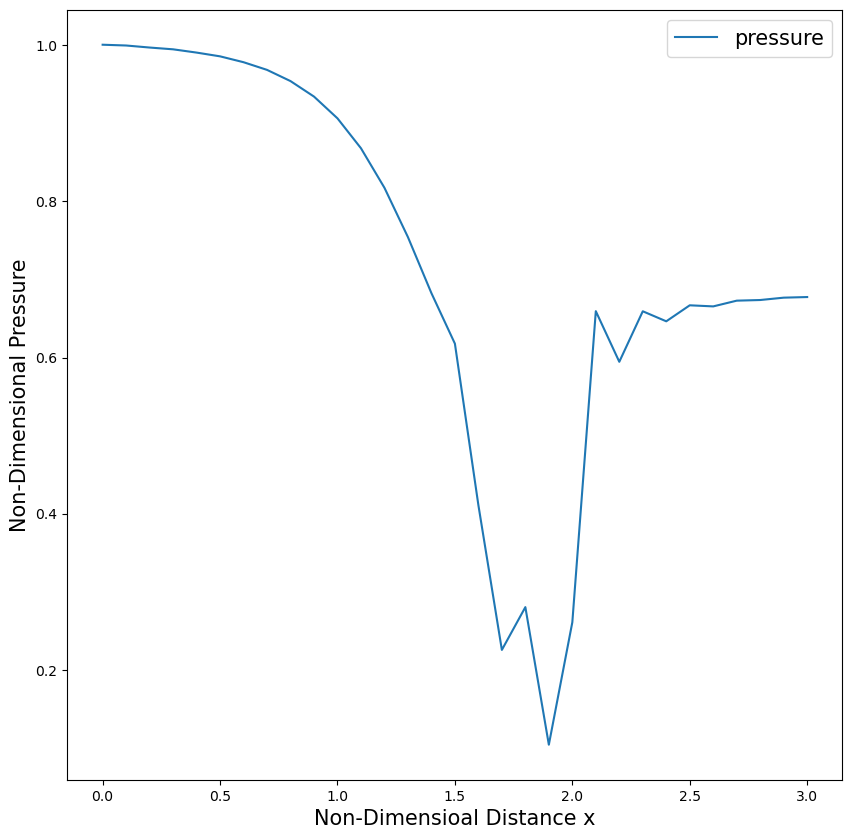

In [24]:
fig = plt.figure(figsize=(10,10), dpi = 100)
ax = fig.add_subplot(111)

ax.plot(x[:], P[:],label = 'pressure', linewidth = 1.5)
ax.set_xlabel("Non-Dimensioal Distance x")
ax.set_ylabel("Non-Dimensional Pressure")
plt.rc('axes', labelsize = 15)
ax.legend(prop={'size': 15})

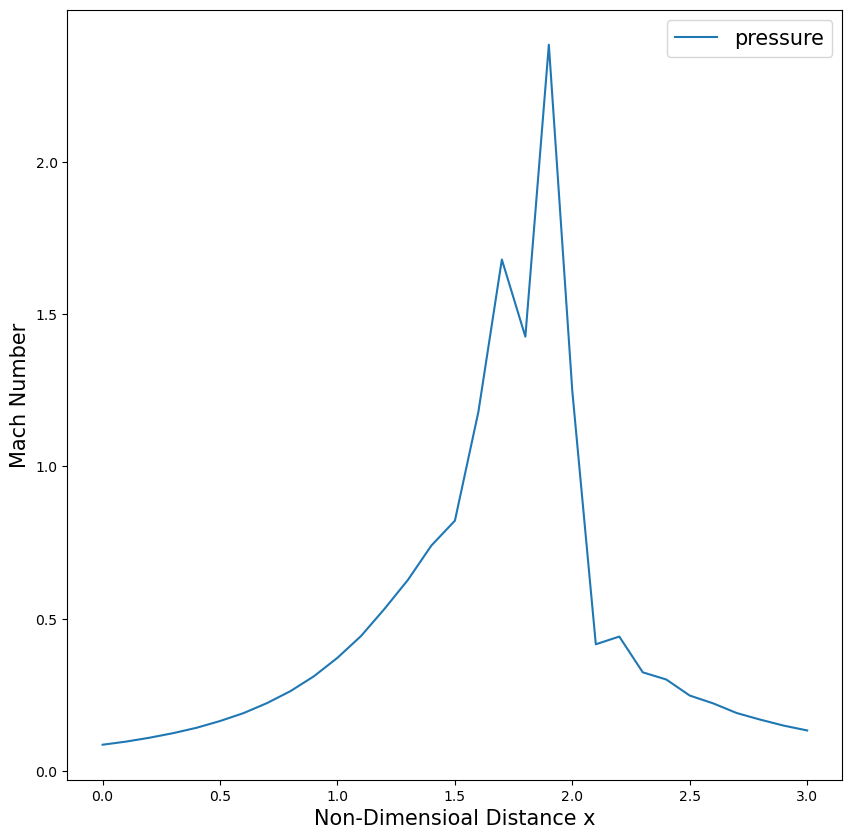

In [25]:
fig = plt.figure(figsize=(10,10), dpi = 100)
ax = fig.add_subplot(111)

ax.plot(x[:], mach_number[:],label = 'pressure', linewidth = 1.5)
ax.set_xlabel("Non-Dimensioal Distance x")
ax.set_ylabel("Mach Number")
plt.rc('axes', labelsize = 15)
ax.legend(prop={'size': 15})